Analyze the astrocytes data generated by Schwab et al.

In [1]:
'''
Created on

DESCRIPTION

@author: ignacio
'''

from lib.utils import *
from lib.plot_utils import *
from lib.SCAnalyzer import SCAnalyzer
import scanpy as sc
import scvelo as scv

from func import *


import pandas..
importing path functions...
importing stat functions...
ipdb is not installed and cannot be imported...
importing misc functions..
importing done...
importing plot functions...
import scanpy
done
import others


In [2]:
import scanpy as sc

In [3]:
ad = sc.read_h5ad("../../data/adata_all.h5ad")

In [4]:
ad

AnnData object with n_obs × n_vars = 3899 × 4274
    obs: 'n_counts', 'log_counts', 'n_genes', 'mt_frac', 'leiden', 'batch'
    var: 'gene_symbol', 'cells_per_gene-0', 'cells_per_gene-1', 'cells_per_gene'
    uns: 'batch_colors', 'leiden', 'leiden_colors', 'neighbors', 'umap', '{var}_colors'
    obsm: 'SC', 'X_pca', 'X_tsne', 'X_umap'
    obsp: 'connectivities', 'distances'

In [5]:
%matplotlib inline

In [6]:
df = pd.read_csv('receptors.tsv', sep='\t')

In [7]:
sc.set_figure_params(facecolor='white')

In [8]:
ad.var['is.receptor'] = ad.var.index.isin(set(df['Approved symbol'].str.capitalize()))
ad.var['is.receptor'].value_counts()

False    4189
True       85
Name: is.receptor, dtype: int64

In [9]:
ad.obs['leiden'] = np.where(ad.obs['leiden'].isin({'3','2'}), ad.obs['leiden'].map({'3': 'neurons', '2': 'astrocytes'}), ad.obs['leiden'])

... storing 'leiden' as categorical
findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.


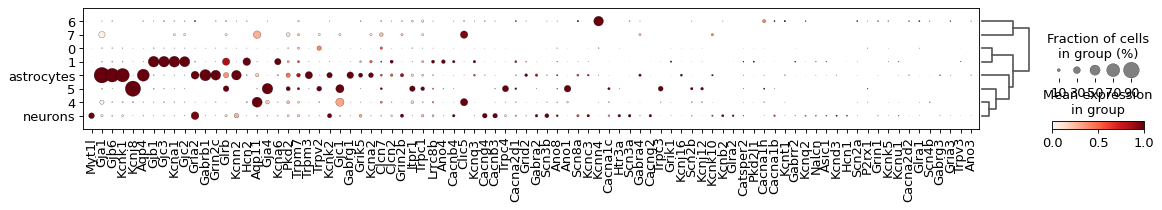

In [10]:
# receptors sorted by mean expression
symbols = ad.to_df().mean().reindex(ad.var[ad.var['is.receptor']].index).sort_values(ascending=False)
sc.pl.dotplot(ad, ['Myt1l'] + list(symbols.index), 'leiden', cmap='Reds', standard_scale='var', dendrogram=True, figsize=[17, 2])

In [21]:
# same but only for GFP positive cells
ad.obs['GFP+'] = (ad.to_df()['611_pAAV_GFP-plus'] > 0) |  (ad.to_df()['611_pAAV_GFP-minus'] > 0)
ad.obs['GFP+'].value_counts()

False    3555
True      344
Name: GFP+, dtype: int64

In [65]:
ad.var

,gene_symbol,cells_per_gene-0,cells_per_gene-1,cells_per_gene,is.receptor
index,,,,,
Sox17,Sox17,139,121,259,False
Rgs20,Rgs20,140,154,289,False
St18,St18,84,102,182,False
Sntg1,Sntg1,2,6,8,False
Vxn,Vxn,4,7,10,False
...,...,...,...,...,...
mt-Nd6,mt-Nd6,88,85,161,False
611_pAAV_GFP-plus,611_pAAV_GFP-plus,71,244,300,False
611_pAAV_GFP-minus,611_pAAV_GFP-minus,35,60,90,False


In [66]:
# same but only for GFP positive cells
ad.obs['GFAP+'] = (ad.to_df()['GFAP-Cre-plus'] > 0) |  (ad.to_df()['GFAP-Cre-minus'] > 0)
ad.obs['GFAP+'].value_counts()

False    3655
True      244
Name: GFAP+, dtype: int64

In [23]:
ad_gfp_pos = ad[ad.obs['GFP+'],:]
ad_gfp_pos.shape

(344, 4274)

In [34]:
# del ad_gfp_pos.uns['dendrogram_leiden']
sc.tl.dendrogram(ad_gfp_pos, groupby='leiden')

Trying to set attribute `.uns` of view, copying.


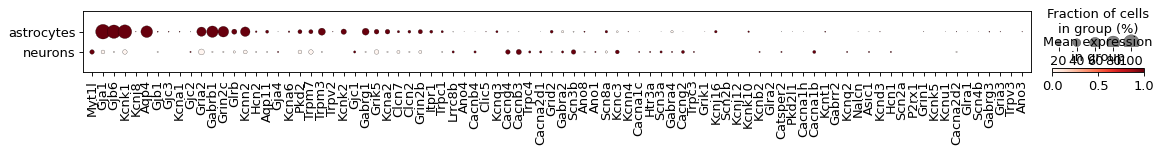

In [38]:
# receptors sorted by mean expression
symbols = ad.to_df().mean().reindex(ad.var[ad.var['is.receptor']].index).sort_values(ascending=False)
sc.pl.dotplot(ad_gfp_pos[ad_gfp_pos.obs['leiden'].isin({'astrocytes', 'neurons'}),:], ['Myt1l'] + list(symbols.index), 'leiden', cmap='Reds', standard_scale='var', dendrogram=True, figsize=[17, 1])

In [59]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 10, 5

Text(0.5, 1.0, 'only GFP+ cells n=344')

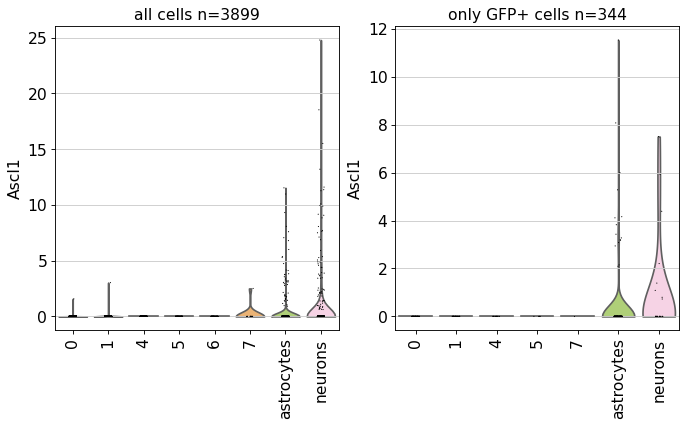

In [62]:
ax = plt.subplot(1, 2, 1)
sc.pl.violin(ad, 'Ascl1', groupby='leiden', rotation=90, ha='right', ax=ax, show=False)
plt.title('all cells n=%i' % ad.shape[0])
ax = plt.subplot(1, 2, 2)
ad_sel = ad[ad.obs['GFP+'],:]
sc.pl.violin(ad_sel, 'Ascl1', groupby='leiden', rotation=90, ha='right', ax=ax, show=False)
plt.title('only GFP+ cells n=%i' % ad_sel.shape[0])

findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.


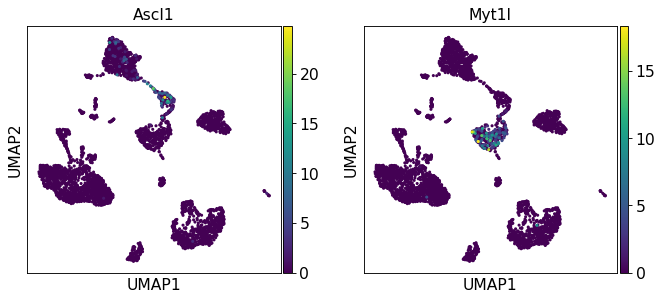

In [11]:
sc.pl.umap(ad, color=['Ascl1', 'Myt1l']) # color='leiden')

findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.


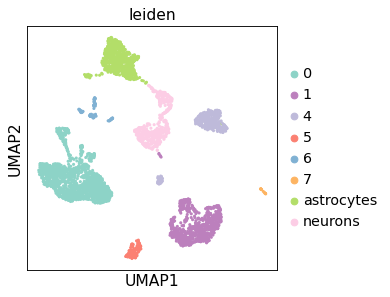

In [12]:
sc.pl.umap(ad, color='leiden')

In [93]:
counts = ad.obs[['leiden', 'GFAP+']].groupby(['leiden', 'GFAP+']).size().reset_index()
counts = counts[counts['leiden'].isin({'astrocytes', 'neurons'})]
counts['fraction'] = counts[0] / sum(counts[0])
counts

,leiden,GFAP+,0,fraction
12,astrocytes,False,524,0.459246
13,astrocytes,True,153,0.134093
14,neurons,False,454,0.397897
15,neurons,True,10,0.008764


In [96]:
ad

AnnData object with n_obs × n_vars = 3899 × 4274
    obs: 'n_counts', 'log_counts', 'n_genes', 'mt_frac', 'leiden', 'batch', 'GFP+', 'GFAP+'
    var: 'gene_symbol', 'cells_per_gene-0', 'cells_per_gene-1', 'cells_per_gene', 'is.receptor'
    uns: 'batch_colors', 'leiden', 'leiden_colors', 'neighbors', 'umap', '{var}_colors', 'dendrogram_leiden'
    obsm: 'SC', 'X_pca', 'X_tsne', 'X_umap'
    obsp: 'connectivities', 'distances'

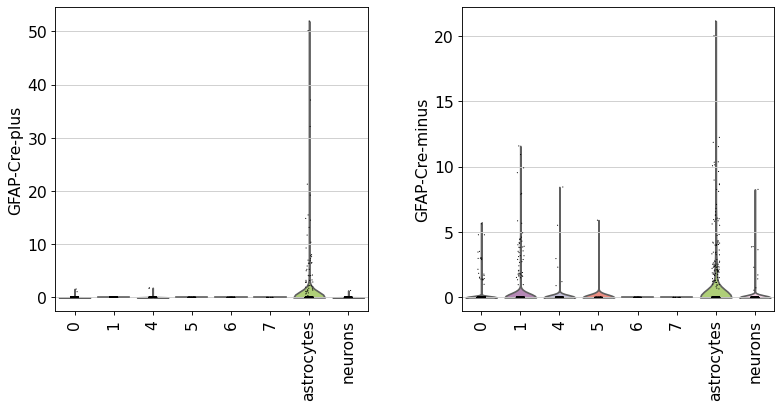

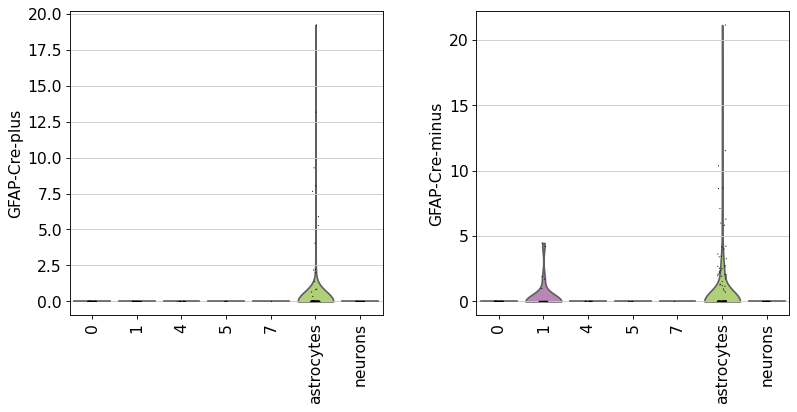

In [108]:
rcParams['figure.figsize'] = 5, 5
sc.pl.violin(ad, ['GFAP-Cre-plus', 'GFAP-Cre-minus'], 'leiden', rotation=90)
sc.pl.violin(ad_sel, ['GFAP-Cre-plus', 'GFAP-Cre-minus'], 'leiden', rotation=90)
